# Mandatory Challenge
## Context
You work in the data analysis team of a very important company. On Monday, the company shares some good news with you: you just got hired by a major retail company! So, let's get prepared for a huge amount of work!

Then you get to work with your team and define the following tasks to perform:   
1. You need to start your analysis using data from the past.  
2. You need to define a process that takes your daily data as an input and integrates it.  

You are in charge of the second part, so you are provided with a sample file that you will have to read daily. To complete you task, you need the following aggregates:
* One aggregate per store that adds up the rest of the values.
* One aggregate per item that adds up the rest of the values.

You can import the dataset `retail_sales` from Ironhack's database. 

## Your task
Therefore, your process will consist of the following steps:
1. Read the sample file that a daily process will save in your folder. 
2. Clean up the data.
3. Create the aggregates.
4. Write three tables in your local database: 
    - A table for the cleaned data.
    - A table for the aggregate per store.
    - A table for the aggregate per item.

## Instructions
* Read the csv you can find in Ironhack's database.
* Clean the data and create the aggregates as you consider.
* Create the tables in your local database.
* Populate them with your process.

## Import libraries 

In [39]:
# your code here
# your code here
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

driver = 'mysql+pymysql:'
user = 'ironhacker_read'
password = 'ir0nhack3r'
ip = '35.239.232.23'
database = 'retail_sales'

## Create connection string and download databases

In [40]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'

In [41]:
engine = create_engine(connection_string)
engine.table_names() # if we want to see the columns that we have in our dataset 

['raw_sales', 'sales_by_item', 'sales_by_item_index', 'sales_by_shop']

In [4]:

query = """
        SELECT * FROM raw_sales;
"""


query2 = """
        SELECT * FROM sales_by_item;
"""

query3 = """
        SELECT * FROM sales_by_item_index;
"""

query4 = """
        SELECT * FROM sales_by_shop;
"""

In [5]:
raw_sales = pd.read_sql(query, engine)
sales_by_item = pd.read_sql(query2, engine)
sales_by_item_index = pd.read_sql(query3, engine)
sales_by_shop = pd.read_sql(query4, engine)


In [6]:
raw_sales.head()

,date,shop_id,item_id,item_price,item_cnt_day
0,2015-01-04,29,1469,1199.0,1.0
1,2015-01-04,28,21364,479.0,1.0
2,2015-01-04,28,21365,999.0,2.0
3,2015-01-04,28,22104,249.0,2.0
4,2015-01-04,28,22091,179.0,1.0


In [7]:
raw_sales.sort_values(by='item_price')

,date,shop_id,item_id,item_price,item_cnt_day
2977,2015-01-04,10,20949,3.0,2.0
1462,2015-01-04,10,20949,3.0,2.0
4492,2015-01-04,10,20949,3.0,2.0
1422,2015-01-04,18,20949,5.0,2.0
2343,2015-01-04,52,20949,5.0,2.0
2520,2015-01-04,35,20949,5.0,2.0
1058,2015-01-04,59,20949,5.0,2.0
4035,2015-01-04,35,20949,5.0,2.0
2082,2015-01-04,56,20949,5.0,1.0
4088,2015-01-04,59,20949,5.0,2.0


In [8]:
raw_sales.head()

,date,shop_id,item_id,item_price,item_cnt_day
0,2015-01-04,29,1469,1199.0,1.0
1,2015-01-04,28,21364,479.0,1.0
2,2015-01-04,28,21365,999.0,2.0
3,2015-01-04,28,22104,249.0,2.0
4,2015-01-04,28,22091,179.0,1.0


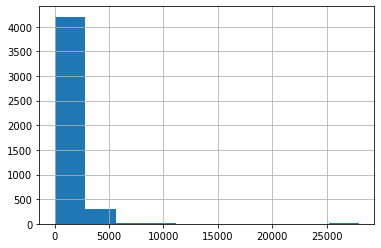

In [9]:
# We want to draw an histogram to see what's the distribution of the prices along the dataset. 
# This will help us to analyze whether there are anormal values in our dataset. 

raw_sales['item_price'].hist()
plt.show()

In [25]:
# From here, we can see that there are prices that are completely out of the range. The best idea is to drop 
# these values 

#df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)


raw_sales["error"] = raw_sales["item_price"].apply(lambda x: x>20000)
raw_sales = raw_sales[raw_sales["error"] == False]
raw_sales.head()

raw_sales = raw_sales.drop(['error'], axis = 1)

In [26]:
raw_sales.head()


,date,shop_id,item_id,item_price,item_cnt_day
0,2015-01-04,29,1469,1199.0,1.0
1,2015-01-04,28,21364,479.0,1.0
2,2015-01-04,28,21365,999.0,2.0
3,2015-01-04,28,22104,249.0,2.0
4,2015-01-04,28,22091,179.0,1.0


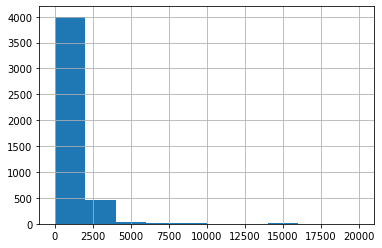

In [27]:
raw_sales['item_price'].hist()
plt.show()

In [28]:
raw_sales.describe()

,shop_id,item_id,item_price,item_cnt_day
count,4527.000000,4527.000000,4527.000000,4527.000000
mean,34.003313,11144.813121,928.602037,1.104042
std,16.586314,6567.875718,1277.517426,0.537994
min,2.000000,30.000000,3.000000,-1.000000
25%,22.000000,4962.000000,249.000000,1.000000
50%,31.000000,11247.000000,479.000000,1.000000
75%,50.000000,16676.000000,1189.000000,1.000000
max,59.000000,22162.000000,19990.000000,10.000000


In [36]:
# we are finding the negative value on item_cnt_day 

neg_values_df = raw_sales.sort_values(by='item_cnt_day')



In [37]:
neg_values_df[neg_values_df['item_cnt_day'] == -1]
#df[df['item_cnt_day'] == -1]['item_cnt_day'] = 0

,date,shop_id,item_id,item_price,item_cnt_day
305,2015-01-04,25,2575,2099.00,-1.0
901,2015-01-04,44,8095,499.00,-1.0
4191,2015-01-04,42,1878,2599.00,-1.0
391,2015-01-04,21,1523,799.00,-1.0
2676,2015-01-04,42,1878,2599.00,-1.0
1694,2015-01-04,35,7877,3990.00,-1.0
926,2015-01-04,44,1114,299.00,-1.0
899,2015-01-04,44,14652,199.00,-1.0
386,2015-01-04,21,2946,449.00,-1.0
179,2015-01-04,35,7877,3990.00,-1.0


## Sales by item:  Data Cleaning and aggregating

In [11]:
sales_by_item.head()

,item_id,item_earnings,total_items_sold,date
0,30,169.0,1.0,03/09/2019
1,31,363.0,1.0,03/09/2019
2,32,149.0,1.0,03/09/2019
3,42,299.0,1.0,03/09/2019
4,59,249.0,1.0,03/09/2019


In [12]:
sales_by_item_index.head()

,id,item_id,item_earnings,total_items_sold,date
0,1,30,169.0,1.0,03/12/2019
1,2,31,363.0,1.0,03/12/2019
2,3,32,149.0,1.0,03/12/2019
3,4,42,299.0,1.0,03/12/2019
4,5,59,249.0,1.0,03/12/2019


## Sales by shop: Data Cleaning and aggregating

First of all, we take a look at the types of each column. Then, we can see that we shoul change the date into a datetime index

In [13]:
sales_by_shop.info()
sales_by_shop = sales_by_shop.astype({"date": "datetime64[ns]"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
shop_id             90 non-null int64
shop_earnings       90 non-null float64
total_items_sold    90 non-null float64
date                90 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB


In [14]:
sales_by_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
shop_id             90 non-null int64
shop_earnings       90 non-null float64
total_items_sold    90 non-null float64
date                90 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.9 KB


In [15]:
#Check in describe which is the structure of the elements and the range of each value. 
sales_by_shop.describe()

,shop_id,shop_earnings,total_items_sold
count,90.000000,90.000000,90.000000
mean,32.311111,34733.432741,37.155556
std,17.621262,25449.615414,28.852165
min,2.000000,3095.000000,6.000000
25%,18.000000,15703.000000,20.000000
50%,34.000000,28579.000000,26.000000
75%,48.000000,45106.000000,50.000000
max,59.000000,109288.000000,134.000000


In [16]:
sales_by_shop.sort_values(by='shop_earnings')

,shop_id,shop_earnings,total_items_sold,date
36,51,3095.000000,8.0,2019-03-09
81,51,3095.000000,8.0,2019-03-12
22,34,4039.000000,6.0,2019-03-09
67,34,4039.000000,6.0,2019-03-12
51,10,7569.000000,10.0,2019-03-12
6,10,7569.000000,10.0,2019-03-09
2,4,9787.000000,13.0,2019-03-09
47,4,9787.000000,13.0,2019-03-12
26,39,10123.000000,18.0,2019-03-09
71,39,10123.000000,18.0,2019-03-12


### csv export to local database

In [17]:
# Workbench Databench 
driver = 'mysql+pymysql'
user = 'root'
password = 'iMc91linux'
ip = 'localhost'
database = 'lab_df_calc'

In [18]:
connection_string = f'{driver}://{user}:{password}@{ip}/{database}'

In [19]:
engine = create_engine(connection_string)

In [20]:
#In this summary table we can see that the values are realistic. 
#We don't see any problem in the descriptive information provided 
#min, max, mean, std values are ok and in the range. 

## Sales by item: Data Cleaning and aggregating

In [21]:
sales_by_item.info()
sales_by_item = sales_by_item.astype({"date": "datetime64[ns]"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 4 columns):
item_id             2955 non-null int64
item_earnings       2955 non-null float64
total_items_sold    2955 non-null float64
date                2955 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 92.4+ KB


In [22]:
sales_by_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 4 columns):
item_id             2955 non-null int64
item_earnings       2955 non-null float64
total_items_sold    2955 non-null float64
date                2955 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 92.4 KB


In [23]:
sales_by_item_shop.head()

NameError: name 'sales_by_item_shop' is not defined